<p style="text-align:center; font-size:3.0em; color:#AD7D67; line-height:5rem; font-style:italic; font-weight:700;">
    Projet MLops :<br>
    Prévision des accidents de la circulation routière en France </p>
<p style="text-align:center; font-size:2.6em; color:#9EBEB8; line-height:4rem; font-style:italic; font-weight:700;">
    Préparation du Dataset
</p>

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-de-l'environnement-et-des-données-2019-2020-2021" data-toc-modified-id="Importation-de-l'environnement-et-des-données-2019-2020-2021-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation de l'environnement et des données 2019-2020-2021</a></span><ul class="toc-item"><li><span><a href="#Importation-des-Librairies" data-toc-modified-id="Importation-des-Librairies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importation des Librairies</a></span></li><li><span><a href="#Importation-des-données-Brutes" data-toc-modified-id="Importation-des-données-Brutes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importation des données Brutes</a></span></li></ul></li><li><span><a href="#DataFrame-journalier-du-nombre-d'accidents" data-toc-modified-id="DataFrame-journalier-du-nombre-d'accidents-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DataFrame journalier du nombre d'accidents</a></span><ul class="toc-item"><li><span><a href="#One-hot-encoding-des-variables-catégorielles" data-toc-modified-id="One-hot-encoding-des-variables-catégorielles-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>One hot encoding des variables catégorielles</a></span></li><li><span><a href="#Création-df-groupé-par-datetime" data-toc-modified-id="Création-df-groupé-par-datetime-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Création df groupé par datetime</a></span></li></ul></li></ul></div>

# Importation de l'environnement et des données 2019-2020-2021

## Importation des Librairies

In [1]:
import warnings
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stat
from datetime import datetime

# Visualisation
import seaborn as sns
from xplotter.insights import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

sns.set_style("ticks")
sns.color_palette("pink", as_cmap=True)

# pour ne pas imprimer les nombres en format scientifique
# et pour imprimer les float avec une précision de 2

#pd.set_option('display.max_columns', 25)
#pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_colwidth', 30)
pd.set_option('display.float_format', '{:,.2f}'.format)

# pour ne pas imprimer les warnings
warnings.filterwarnings('ignore')

# version des librairies utilisées
import sys
print("python version", sys.version)
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("scipy version :", scipy.__version__)
print("matplotlib version :", matplotlib.__version__)
print("seaborn version :", sns.__version__)

python version 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
pandas version : 1.5.3
numpy version : 1.23.5
scipy version : 1.10.0
matplotlib version : 3.7.0
seaborn version : 0.12.2


## Importation des données Brutes

In [2]:
df_2019 = pd.read_csv("../data/accidents_2019.csv")
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132876 entries, 0 to 132875
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   place_occupée               132876 non-null  object
 1   catégorie_usager            132876 non-null  object
 2   sexe                        132876 non-null  object
 3   trajet                      132876 non-null  object
 4   secu1                       132876 non-null  object
 5   secu2                       132876 non-null  object
 6   secu3                       132876 non-null  object
 7   gravite_accident            132876 non-null  object
 8   age                         132876 non-null  object
 9   nb_equipement_securite      132876 non-null  object
 10  mois                        132876 non-null  int64 
 11  annee                       132876 non-null  int64 
 12  luminosite                  132876 non-null  object
 13  departement                 1

In [3]:
df_2019["date"].value_counts()

2019-06-21    571
2019-12-20    564
2019-06-28    537
2019-04-07    535
2019-05-07    527
             ... 
2019-01-20    227
2019-01-27    226
2019-08-15    220
2019-06-01    206
2019-12-25    196
Name: date, Length: 365, dtype: int64

In [4]:
df_2020 = pd.read_csv("../data/accidents_2020.csv")
display(df_2020.info())
display(df_2020["date"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105232 entries, 0 to 105231
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   place_occupée               105232 non-null  object
 1   catégorie_usager            105232 non-null  object
 2   sexe                        105232 non-null  object
 3   trajet                      105232 non-null  object
 4   secu1                       105232 non-null  object
 5   secu2                       105232 non-null  object
 6   secu3                       105232 non-null  object
 7   gravite_accident            105232 non-null  object
 8   age                         105232 non-null  object
 9   nb_equipement_securite      105232 non-null  object
 10  mois                        105232 non-null  int64 
 11  annee                       105232 non-null  int64 
 12  luminosite                  105232 non-null  object
 13  departement                 1

None

2020-04-09    485
2020-11-09    484
2020-10-29    480
2020-09-18    467
2020-07-07    465
             ... 
2020-03-22     37
2020-03-21     37
2020-04-13     34
2020-03-24     31
2020-03-29     24
Name: date, Length: 366, dtype: int64

In [5]:
df_2021 = pd.read_csv("../data/accidents_2021.csv")
display(df_2021.info())
display(df_2021["date"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129153 entries, 0 to 129152
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   place_occupée               129153 non-null  object
 1   catégorie_usager            129153 non-null  object
 2   sexe                        129153 non-null  object
 3   trajet                      129153 non-null  object
 4   secu1                       129153 non-null  object
 5   secu2                       129153 non-null  object
 6   secu3                       129153 non-null  object
 7   gravite_accident            129153 non-null  object
 8   age                         129153 non-null  object
 9   nb_equipement_securite      129153 non-null  object
 10  mois                        129153 non-null  int64 
 11  annee                       129153 non-null  int64 
 12  luminosite                  129153 non-null  object
 13  departement                 1

None

2021-11-06    616
2021-09-10    595
2021-10-22    580
2021-09-06    557
2021-06-16    556
             ... 
2021-01-31    187
2021-03-01    168
2021-07-02    162
2021-02-14    162
2021-05-04    155
Name: date, Length: 365, dtype: int64

In [6]:
df_accidents = pd.concat([df_2019, df_2020, df_2021]).reset_index()

df_accidents.drop(labels=["index"], axis=1, inplace=True)

df_accidents["date"] = pd.to_datetime(df_accidents["date"])

# Convertir la colonne 'heure' en timedelta et l'ajouter à la colonne 'date'
df_accidents['datetime'] = df_accidents['date'] + pd.to_timedelta(df_accidents['heure'], unit='h')

df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367261 entries, 0 to 367260
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   place_occupée               367261 non-null  object        
 1   catégorie_usager            367261 non-null  object        
 2   sexe                        367261 non-null  object        
 3   trajet                      367261 non-null  object        
 4   secu1                       367261 non-null  object        
 5   secu2                       367261 non-null  object        
 6   secu3                       367261 non-null  object        
 7   gravite_accident            367261 non-null  object        
 8   age                         367261 non-null  object        
 9   nb_equipement_securite      367261 non-null  object        
 10  mois                        367261 non-null  int64         
 11  annee                       367261 non-

In [7]:
df_accidents.isna().sum().sum()

0

In [8]:
print(f"Nombre de lignes dupliquées : {df_accidents.duplicated().sum()}")

Nombre de lignes dupliquées : 3866


In [9]:
df_accidents.drop_duplicates(keep="first", inplace=True)
print(f"Nombre de lignes dupliquées : {df_accidents.duplicated().sum()}")

Nombre de lignes dupliquées : 0


In [10]:
df_accidents.shape

(363395, 42)

In [11]:
df_accidents["gravite_accident"].value_counts()

indemne               151702
blessé_léger          145790
blessé_hospitalisé     56392
tué                     9452
autre                     59
Name: gravite_accident, dtype: int64

In [12]:
# Suppression des 59 usagers "autre"

df_accidents = df_accidents[df_accidents["gravite_accident"] != "autre"]
df_accidents.shape

(363336, 42)

In [13]:
df_accidents["gravite_accident"].value_counts()

indemne               151702
blessé_léger          145790
blessé_hospitalisé     56392
tué                     9452
Name: gravite_accident, dtype: int64

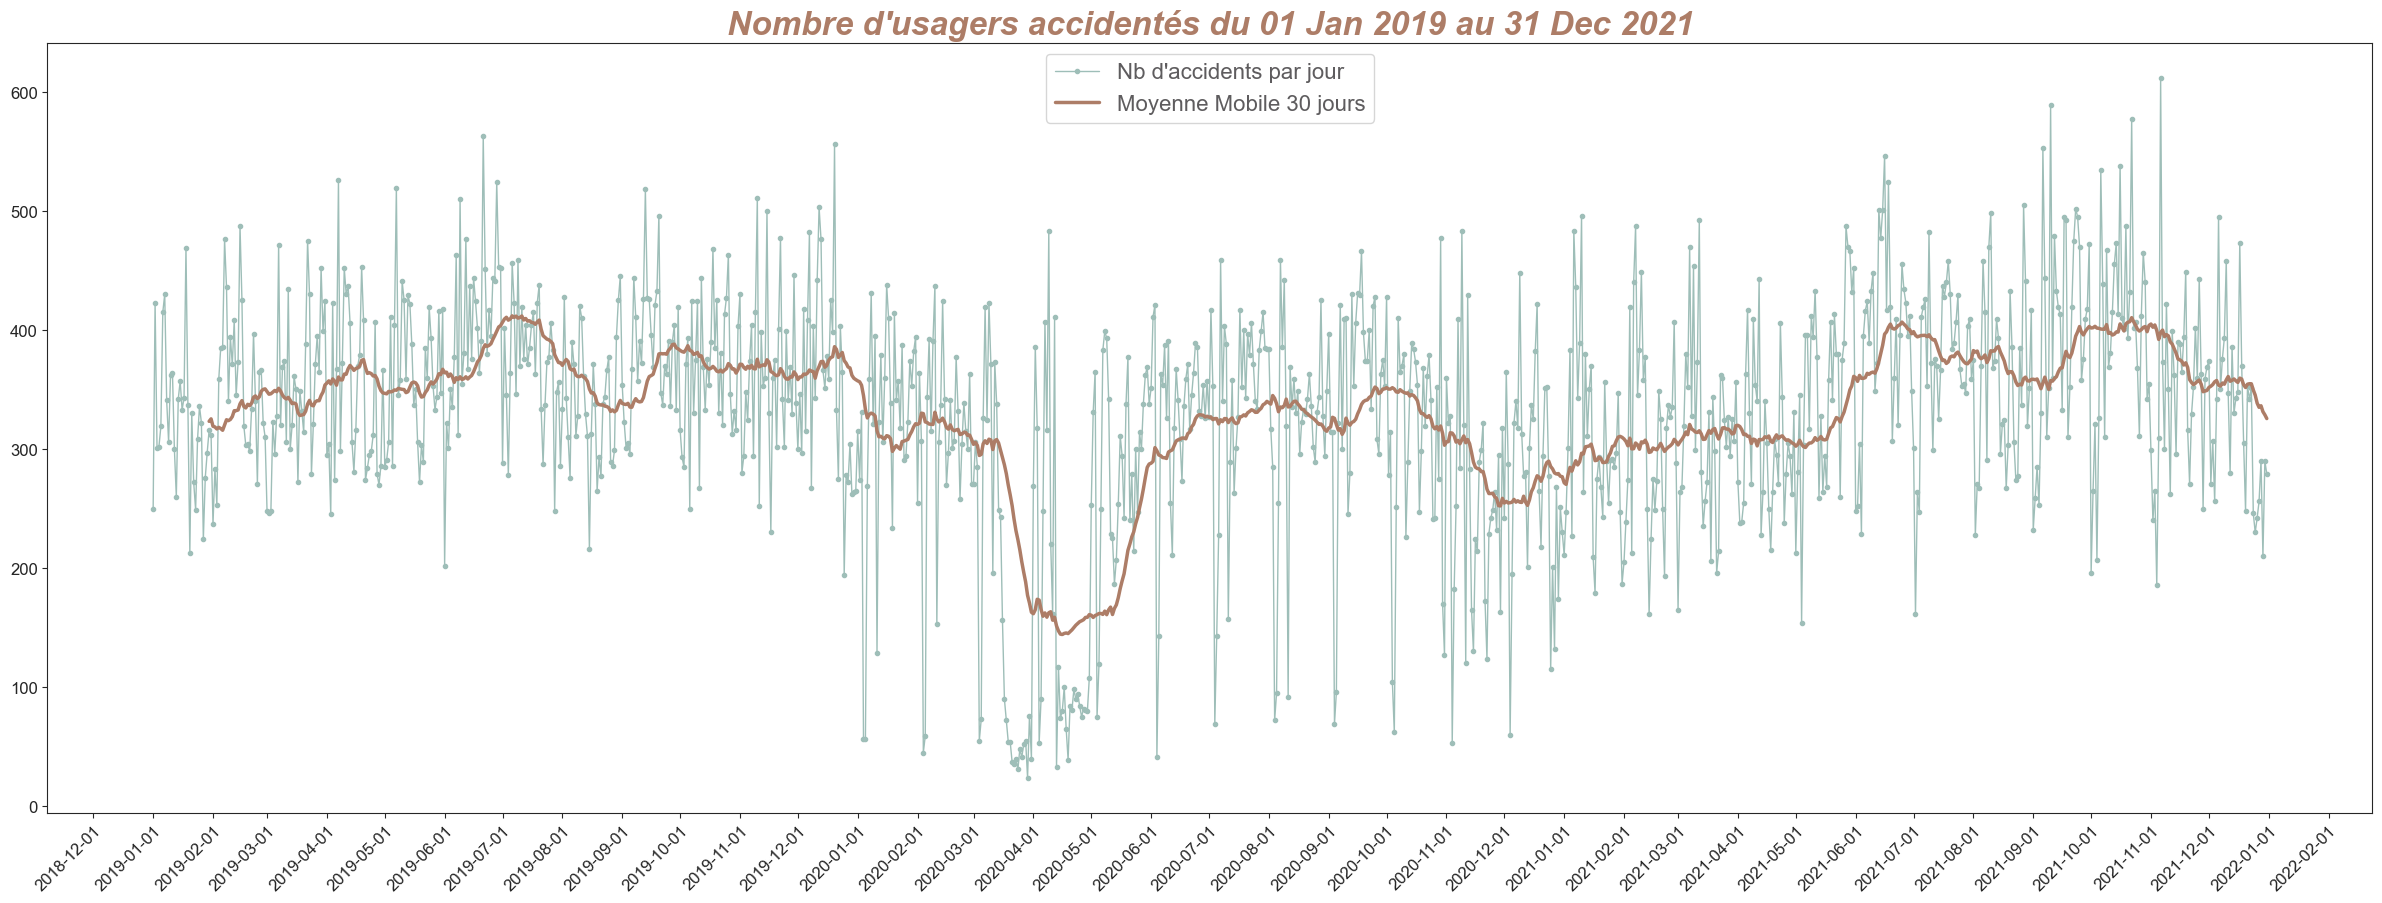

In [14]:
import matplotlib.dates as mdates

values = df_accidents["date"].value_counts().sort_index()

plt.figure(figsize=(30, 10))

plt.plot_date(
    values.index,
    values,
    linestyle="-",
    lw=1,
    color="#9ebeb8",
    marker=".",
    label="Nb d'accidents par jour",
)

plt.plot_date(
    values.index,
    values.rolling(window=30).mean(),
    linestyle="-",
    lw=2.5,
    color="#ad7d67",
    marker=None,
    label="Moyenne Mobile 30 jours",
)

plt.title(
    f"Nombre d'usagers accidentés du {df_accidents.date.min().strftime('%d %b %Y')} au {df_accidents.date.max().strftime('%d %b %Y')}",
    loc="center",
    fontsize=24,
    fontstyle="italic",
    fontweight="bold",
    color="#ad7d67",
)

# Création d'un format personnalisé pour les étiquettes de l'axe des x
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Afficher une étiquette tous les mois
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(fontsize=12, rotation=45, ha="right", rotation_mode="anchor")

plt.yticks(fontsize=12)

plt.legend(loc="upper center", fontsize=16, labelcolor="#5e5c5e")

plt.show()

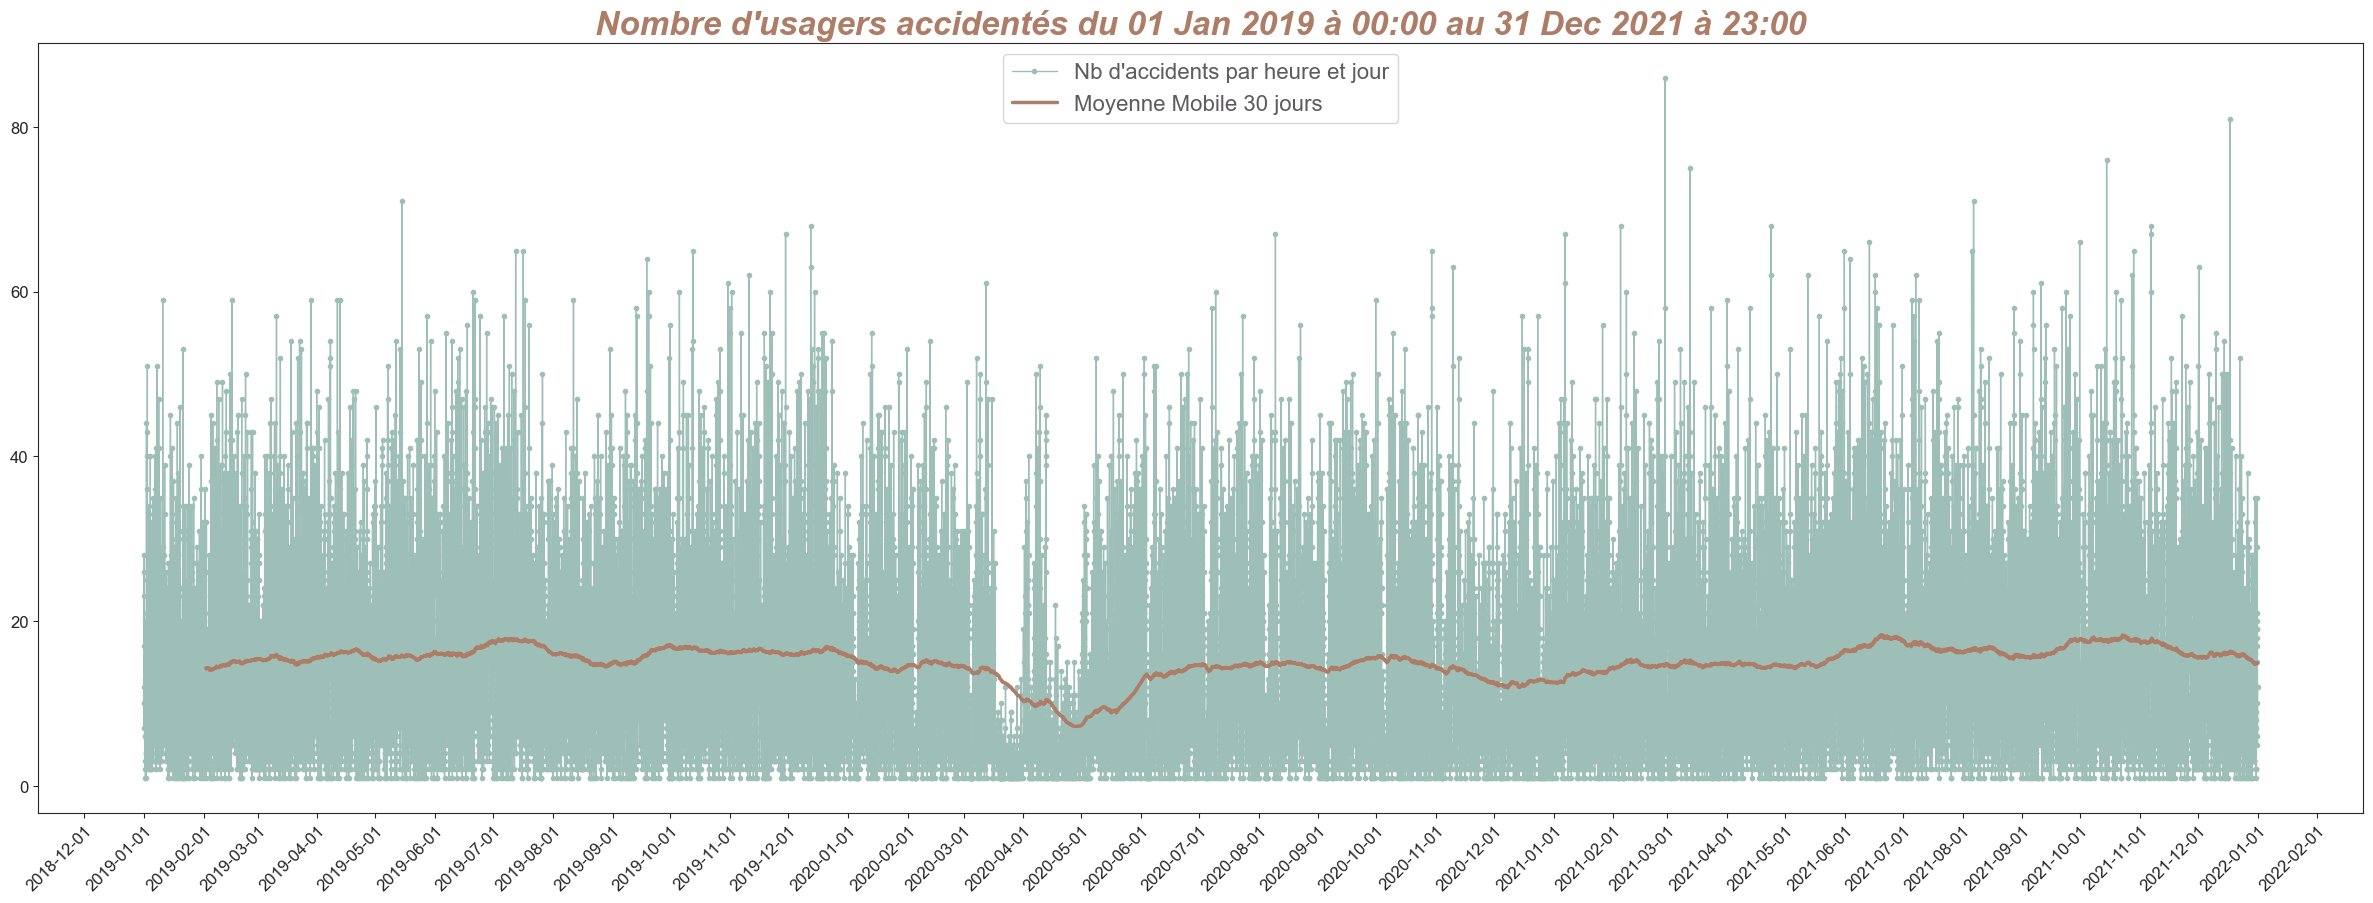

In [15]:
import matplotlib.dates as mdates

values = df_accidents["datetime"].value_counts().sort_index()

plt.figure(figsize=(30, 10))

plt.plot_date(
    values.index,
    values,
    linestyle="-",
    lw=1,
    color="#9ebeb8",
    marker=".",
    label="Nb d'accidents par heure et jour",
)

plt.plot_date(
    values.index,
    values.rolling(window=30*24).mean(),
    linestyle="-",
    lw=2.5,
    color="#ad7d67",
    marker=None,
    label="Moyenne Mobile 30 jours",
)

plt.title(
    f"Nombre d'usagers accidentés du {df_accidents.datetime.min().strftime('%d %b %Y à %H:%M')} au {df_accidents.datetime.max().strftime('%d %b %Y à %H:%M')}",
    loc="center",
    fontsize=24,
    fontstyle="italic",
    fontweight="bold",
    color="#ad7d67",
)

# Création d'un format personnalisé pour les étiquettes de l'axe des x
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Afficher une étiquette tous les mois
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(fontsize=12, rotation=45, ha="right", rotation_mode="anchor")

plt.yticks(fontsize=12)

plt.legend(loc="upper center", fontsize=16, labelcolor="#5e5c5e")

plt.show()

# DataFrame journalier du nombre d'accidents

In [16]:
def cat_analyzer(dataframe, variable):
    print(variable)
    print(
        pd.DataFrame(
            {
                "COUNT": dataframe[variable].value_counts(),
                "RATIO": dataframe[variable].value_counts() / len(dataframe) * 100,
            }
        ),
        end="\n\n\n",
    )

In [17]:
var_cat = df_accidents.select_dtypes(include="object").columns.to_list()
print(var_cat)

['place_occupée', 'catégorie_usager', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'gravite_accident', 'age', 'nb_equipement_securite', 'luminosite', 'departement', 'num_commune', 'localisation', 'intersection', 'condition_atmospheriques', 'type_collision', 'latitude', 'longitude', 'weekday', 'tranche_heure', 'nom_dep', 'region', 'categorie_route', 'sens_circulation', 'nbr_voies', 'declivite_route', 'trace_plan', 'etat_surface', 'infrastructure', 'situation_accident', 'vitesse_maximale_autorisee', 'repère_sens_circulation', 'catégorie_véhicule', 'obstacle_mobile_heurté', 'choc_initial', 'manoeuvre_principale']


In [18]:
for cat in var_cat:
    cat_analyzer(df_accidents, cat)

place_occupée
                   COUNT  RATIO
conducteur        271485  74.72
passager_avant     41750  11.49
piéton             28685   7.89
passager_arrière   13530   3.72
autre               7886   2.17


catégorie_usager
             COUNT  RATIO
conducteur  272143  74.90
passager     62508  17.20
piéton       28685   7.89


sexe
        COUNT  RATIO
homme  246601  67.87
femme  113740  31.30
autre    2995   0.82


trajet
                      COUNT  RATIO
trajet_personnel     153274  42.19
autres               126393  34.79
trajet_professionel   83669  23.03


secu1
         COUNT  RATIO
oui     287458  79.12
autres   47289  13.02
non      28589   7.87


secu2
         COUNT  RATIO
autres  173621  47.79
non     145350  40.00
oui      44365  12.21


secu3
         COUNT  RATIO
autres  359281  98.88
oui       2957   0.81
non       1098   0.30


gravite_accident
                     COUNT  RATIO
indemne             151702  41.75
blessé_léger        145790  40.13
blessé_hospitalisé   5

## One hot encoding des variables catégorielles

In [19]:
var_sup = ["secu3", "departement", "num_commune", "mois", 'annee', "weekday", "tranche_heure"]

df_accidents = df_accidents.drop(labels = var_sup, axis = 1)

In [20]:
# changement du type des variables latitude, longitude et heure

df_accidents['latitude'] = df_accidents['latitude'].str.replace(',', '.')
df_accidents['latitude'] = df_accidents['latitude'].astype(float)

df_accidents['longitude'] = df_accidents['longitude'].str.replace(',', '.')
df_accidents['longitude'] = df_accidents['longitude'].astype(float)

In [21]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363336 entries, 0 to 367260
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   place_occupée               363336 non-null  object        
 1   catégorie_usager            363336 non-null  object        
 2   sexe                        363336 non-null  object        
 3   trajet                      363336 non-null  object        
 4   secu1                       363336 non-null  object        
 5   secu2                       363336 non-null  object        
 6   gravite_accident            363336 non-null  object        
 7   age                         363336 non-null  object        
 8   nb_equipement_securite      363336 non-null  object        
 9   luminosite                  363336 non-null  object        
 10  localisation                363336 non-null  object        
 11  intersection                363336 non-

In [22]:
df_accidents.head()

,place_occupée,catégorie_usager,sexe,trajet,secu1,secu2,gravite_accident,age,nb_equipement_securite,luminosite,...,etat_surface,infrastructure,situation_accident,vitesse_maximale_autorisee,repère_sens_circulation,catégorie_véhicule,obstacle_mobile_heurté,choc_initial,manoeuvre_principale,datetime
0,passager_avant,passager,femme,autres,oui,non,blessé_léger,21_ans_et_moins,1_equipement,Nuit sans éclairage public ou non allumé,...,normale,Oui,sur_chaussee,70,PK_PR_num_adresse_décroissant,véhicule_léger_utilitaire_seul,Oui_véhicule,Oui_arrière,manoeuvre_divers,2019-11-30 01:00:00
1,conducteur,conducteur,femme,trajet_personnel,oui,non,blessé_léger,22_a_30_ans,1_equipement,Nuit sans éclairage public ou non allumé,...,normale,Oui,sur_chaussee,70,PK_PR_num_adresse_décroissant,véhicule_léger_utilitaire_seul,Oui_véhicule,Oui_arrière,manoeuvre_divers,2019-11-30 01:00:00
2,conducteur,conducteur,homme,autres,oui,non,indemne,54_ans_et_plus,1_equipement,Nuit sans éclairage public ou non allumé,...,normale,Oui,sur_chaussee,70,PK_PR_num_adresse_décroissant,poids_lourd_tracteurs,Non,Oui_avant,manoeuvre_a_gauche,2019-11-30 01:00:00
3,conducteur,conducteur,femme,autres,oui,non,blessé_léger,22_a_30_ans,1_equipement,Nuit sans éclairage public ou non allumé,...,normale,Non,sur_chaussee,70,PK_PR_num_adresse_croissant,véhicule_léger_utilitaire_seul,Non,Oui_avant,autre_inconnu,2019-11-30 02:00:00
4,conducteur,conducteur,homme,autres,oui,non,indemne,22_a_30_ans,1_equipement,Plein jour,...,normale,Non,sur_chaussee,90,PK_PR_num_adresse_croissant,véhicule_léger_utilitaire_seul,Oui_véhicule,Oui_avant,Même_sens_même_file,2019-11-28 15:00:00


In [23]:
var_cat_nominale = df_accidents.select_dtypes(include='object').columns.to_list()
print(var_cat_nominale)

['place_occupée', 'catégorie_usager', 'sexe', 'trajet', 'secu1', 'secu2', 'gravite_accident', 'age', 'nb_equipement_securite', 'luminosite', 'localisation', 'intersection', 'condition_atmospheriques', 'type_collision', 'nom_dep', 'region', 'categorie_route', 'sens_circulation', 'nbr_voies', 'declivite_route', 'trace_plan', 'etat_surface', 'infrastructure', 'situation_accident', 'vitesse_maximale_autorisee', 'repère_sens_circulation', 'catégorie_véhicule', 'obstacle_mobile_heurté', 'choc_initial', 'manoeuvre_principale']


In [24]:
from feature_engine.encoding import OneHotEncoder

ohe = OneHotEncoder(
    drop_last=False)

ohe.fit(df_accidents)

ohe.variables_

['place_occupée',
 'catégorie_usager',
 'sexe',
 'trajet',
 'secu1',
 'secu2',
 'gravite_accident',
 'age',
 'nb_equipement_securite',
 'luminosite',
 'localisation',
 'intersection',
 'condition_atmospheriques',
 'type_collision',
 'nom_dep',
 'region',
 'categorie_route',
 'sens_circulation',
 'nbr_voies',
 'declivite_route',
 'trace_plan',
 'etat_surface',
 'infrastructure',
 'situation_accident',
 'vitesse_maximale_autorisee',
 'repère_sens_circulation',
 'catégorie_véhicule',
 'obstacle_mobile_heurté',
 'choc_initial',
 'manoeuvre_principale']

In [25]:
df_accidents_t = ohe.transform(df_accidents)

df_accidents_t.sample(10)

,latitude,longitude,date,heure,datetime,place_occupée_passager_avant,place_occupée_conducteur,place_occupée_piéton,place_occupée_passager_arrière,place_occupée_autre,...,choc_initial_Oui_avant,choc_initial_Non,choc_initial_Oui_côté_tonneaux,choc_initial_autres,manoeuvre_principale_manoeuvre_divers,manoeuvre_principale_manoeuvre_a_gauche,manoeuvre_principale_autre_inconnu,manoeuvre_principale_Même_sens_même_file,manoeuvre_principale_Sans_changement_de_direction,manoeuvre_principale_manoeuvre_a_droite
55399,49.13,6.27,2019-12-23,8,2019-12-23 08:00:00,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
314959,48.93,2.42,2021-06-19,21,2021-06-19 21:00:00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
80667,48.94,2.22,2019-02-26,22,2019-02-26 22:00:00,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
334571,49.28,4.00,2021-04-29,13,2021-04-29 13:00:00,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
244130,49.73,2.96,2021-12-19,2,2021-12-19 02:00:00,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
228767,49.04,2.02,2020-05-24,13,2020-05-24 13:00:00,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
116916,49.26,4.05,2019-06-01,18,2019-06-01 18:00:00,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
134757,14.45,-60.90,2020-12-20,20,2020-12-20 20:00:00,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2882,48.62,2.39,2019-05-24,3,2019-05-24 03:00:00,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
310810,47.30,0.68,2021-06-30,15,2021-06-30 15:00:00,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [26]:
df_accidents_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363336 entries, 0 to 367260
Columns: 245 entries, latitude to manoeuvre_principale_manoeuvre_a_droite
dtypes: datetime64[ns](2), float64(2), int32(240), int64(1)
memory usage: 349.3 MB


In [27]:
df_accidents.to_csv('../data/df_accidents.csv')
df_accidents_t.to_csv('../data/df_accidents_t.csv')

## Création df groupé par datetime

In [28]:
var_num = ['latitude', 'longitude', 'heure']

In [29]:
var_bool = df_accidents_t.drop(labels=var_num, axis=1).select_dtypes(include='number').columns.to_list()
print(var_bool)

['place_occupée_passager_avant', 'place_occupée_conducteur', 'place_occupée_piéton', 'place_occupée_passager_arrière', 'place_occupée_autre', 'catégorie_usager_passager', 'catégorie_usager_conducteur', 'catégorie_usager_piéton', 'sexe_femme', 'sexe_homme', 'sexe_autre', 'trajet_autres', 'trajet_trajet_personnel', 'trajet_trajet_professionel', 'secu1_oui', 'secu1_autres', 'secu1_non', 'secu2_non', 'secu2_autres', 'secu2_oui', 'gravite_accident_blessé_léger', 'gravite_accident_indemne', 'gravite_accident_blessé_hospitalisé', 'gravite_accident_tué', 'age_21_ans_et_moins', 'age_22_a_30_ans', 'age_54_ans_et_plus', 'age_41_a_54_ans', 'age_31_a_40_ans', 'nb_equipement_securite_1_equipement', 'nb_equipement_securite_2_equipements', 'nb_equipement_securite_autres', 'nb_equipement_securite_0_equipement', 'nb_equipement_securite_3_equipements', 'luminosite_Nuit sans éclairage public ou non allumé', 'luminosite_Plein jour', 'luminosite_Nuit avec éclairage public allumé', 'luminosite_Crépuscule ou 

In [30]:
# Dictionnaire d'agrégation
agg_dict = {col: 'sum' for col in var_bool}
agg_dict.update({col: 'median' for col in var_num})

# Grouper et agréger
nbr_acc_jour = df_accidents_t.groupby('date').agg(agg_dict)

nbr_acc_jour_heure = df_accidents_t.groupby('datetime').agg(agg_dict)

In [31]:
display(nbr_acc_jour.head())
display(nbr_acc_jour.info())

,place_occupée_passager_avant,place_occupée_conducteur,place_occupée_piéton,place_occupée_passager_arrière,place_occupée_autre,catégorie_usager_passager,catégorie_usager_conducteur,catégorie_usager_piéton,sexe_femme,sexe_homme,...,choc_initial_autres,manoeuvre_principale_manoeuvre_divers,manoeuvre_principale_manoeuvre_a_gauche,manoeuvre_principale_autre_inconnu,manoeuvre_principale_Même_sens_même_file,manoeuvre_principale_Sans_changement_de_direction,manoeuvre_principale_manoeuvre_a_droite,latitude,longitude,heure
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,47,145,15,24,19,89,146,15,70,180,...,0,48,13,22,37,107,23,45.77,3.12,7.00
2019-01-02,48,293,61,7,14,69,293,61,129,294,...,0,87,87,20,43,167,19,47.84,2.42,14.00
2019-01-03,33,227,25,8,8,46,230,25,96,205,...,0,57,46,31,33,121,13,47.45,2.46,15.00
2019-01-04,32,228,30,9,3,43,229,30,96,206,...,0,67,53,13,47,99,23,47.92,2.41,13.00
2019-01-05,65,218,15,13,8,84,220,15,94,225,...,0,58,51,17,35,137,21,45.77,3.01,15.00


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2019-01-01 to 2021-12-31
Columns: 243 entries, place_occupée_passager_avant to heure
dtypes: float64(3), int32(240)
memory usage: 1.0 MB


None

In [32]:
display(nbr_acc_jour_heure.head())
display(nbr_acc_jour_heure.info())

,place_occupée_passager_avant,place_occupée_conducteur,place_occupée_piéton,place_occupée_passager_arrière,place_occupée_autre,catégorie_usager_passager,catégorie_usager_conducteur,catégorie_usager_piéton,sexe_femme,sexe_homme,...,choc_initial_autres,manoeuvre_principale_manoeuvre_divers,manoeuvre_principale_manoeuvre_a_gauche,manoeuvre_principale_autre_inconnu,manoeuvre_principale_Même_sens_même_file,manoeuvre_principale_Sans_changement_de_direction,manoeuvre_principale_manoeuvre_a_droite,latitude,longitude,heure
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,8,0,0,1,2,8,0,2,8,...,0,4,0,0,1,3,2,46.72,4.09,0.00
2019-01-01 01:00:00,4,9,2,2,0,6,9,2,6,11,...,0,3,1,0,2,10,1,48.86,3.50,1.00
2019-01-01 02:00:00,7,13,1,4,1,10,15,1,8,18,...,0,10,1,1,5,8,1,43.43,2.75,2.00
2019-01-01 03:00:00,2,3,0,0,2,4,3,0,2,5,...,0,6,0,0,0,1,0,48.90,-0.20,3.00
2019-01-01 04:00:00,6,14,1,3,4,13,14,1,11,17,...,0,5,3,4,0,14,2,45.97,2.61,4.00


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24138 entries, 2019-01-01 00:00:00 to 2021-12-31 23:00:00
Columns: 243 entries, place_occupée_passager_avant to heure
dtypes: float64(3), int32(240)
memory usage: 22.8 MB


None

In [33]:
col_liste = ['gravite_accident_blessé_hospitalisé', 'gravite_accident_blessé_léger', 'gravite_accident_indemne', 'gravite_accident_tué']

nbr_acc_jour['total_accidents'] = nbr_acc_jour[col_liste].sum(axis=1)
nbr_acc_jour_heure['total_accidents'] = nbr_acc_jour_heure[col_liste].sum(axis=1)

In [34]:
nbr_acc_jour[['gravite_accident_blessé_hospitalisé', 
              'gravite_accident_blessé_léger', 
              'gravite_accident_indemne', 
              'gravite_accident_tué',
              'total_accidents']].head()

,gravite_accident_blessé_hospitalisé,gravite_accident_blessé_léger,gravite_accident_indemne,gravite_accident_tué,total_accidents
date,,,,,
2019-01-01,53,97,84,16,250
2019-01-02,54,172,185,12,423
2019-01-03,54,121,120,6,301
2019-01-04,55,117,121,9,302
2019-01-05,64,123,118,14,319


In [35]:
nbr_acc_jour_heure[[
    'gravite_accident_blessé_hospitalisé', 'gravite_accident_blessé_léger',
    'gravite_accident_indemne', 'gravite_accident_tué', 'total_accidents'
]].head()

,gravite_accident_blessé_hospitalisé,gravite_accident_blessé_léger,gravite_accident_indemne,gravite_accident_tué,total_accidents
datetime,,,,,
2019-01-01 00:00:00,5,0,3,2,10
2019-01-01 01:00:00,4,5,6,2,17
2019-01-01 02:00:00,4,10,10,2,26
2019-01-01 03:00:00,2,1,4,0,7
2019-01-01 04:00:00,2,22,3,1,28


In [36]:
pd.set_option('display.max_rows', 300)
nbr_acc_jour.describe().T

,count,mean,std,min,25%,50%,75%,max
place_occupée_passager_avant,"1,096.00",38.09,16.10,1.00,28.00,36.00,47.25,94.00
place_occupée_conducteur,"1,096.00",247.71,74.87,19.00,209.00,252.50,297.00,468.00
place_occupée_piéton,"1,096.00",26.17,12.45,1.00,17.00,26.00,34.00,74.00
place_occupée_passager_arrière,"1,096.00",12.34,6.96,0.00,7.00,11.00,16.00,43.00
place_occupée_autre,"1,096.00",7.20,5.45,0.00,3.00,6.00,10.00,35.00
catégorie_usager_passager,"1,096.00",57.03,25.89,2.00,40.00,54.00,72.00,148.00
catégorie_usager_conducteur,"1,096.00",248.31,75.11,19.00,209.00,254.00,298.00,469.00
catégorie_usager_piéton,"1,096.00",26.17,12.45,1.00,17.00,26.00,34.00,74.00
sexe_femme,"1,096.00",103.78,32.60,4.00,88.00,107.00,125.00,194.00
sexe_homme,"1,096.00",225.00,64.59,20.00,193.00,231.00,268.00,432.00


In [37]:
pd.set_option('display.max_rows', 300)
nbr_acc_jour_heure.describe().T

,count,mean,std,min,25%,50%,75%,max
place_occupée_passager_avant,"24,138.00",1.73,1.83,0.00,0.00,1.00,3.00,24.00
place_occupée_conducteur,"24,138.00",11.25,8.64,0.00,4.00,9.00,16.00,64.00
place_occupée_piéton,"24,138.00",1.19,1.60,0.00,0.00,1.00,2.00,18.00
place_occupée_passager_arrière,"24,138.00",0.56,1.05,0.00,0.00,0.00,1.00,14.00
place_occupée_autre,"24,138.00",0.33,0.83,0.00,0.00,0.00,0.00,20.00
catégorie_usager_passager,"24,138.00",2.59,2.86,0.00,0.00,2.00,4.00,27.00
catégorie_usager_conducteur,"24,138.00",11.27,8.67,0.00,4.00,9.00,16.00,64.00
catégorie_usager_piéton,"24,138.00",1.19,1.60,0.00,0.00,1.00,2.00,18.00
sexe_femme,"24,138.00",4.71,4.40,0.00,1.00,4.00,7.00,34.00
sexe_homme,"24,138.00",10.22,7.53,0.00,4.00,9.00,15.00,51.00


In [38]:
nbr_acc_jour.to_csv('../data/nbr_acc_jour.csv')
nbr_acc_jour_heure.to_csv('../data/nbr_acc_jour_heure.csv')